In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
def f(x):
    return 5*x**2 - 2*x + 1

In [3]:
f(10)

481

In [4]:
f(-10)

521

In [5]:
xs = np.arange(-10, 10, 0.25)
xs

array([-10.  ,  -9.75,  -9.5 ,  -9.25,  -9.  ,  -8.75,  -8.5 ,  -8.25,
        -8.  ,  -7.75,  -7.5 ,  -7.25,  -7.  ,  -6.75,  -6.5 ,  -6.25,
        -6.  ,  -5.75,  -5.5 ,  -5.25,  -5.  ,  -4.75,  -4.5 ,  -4.25,
        -4.  ,  -3.75,  -3.5 ,  -3.25,  -3.  ,  -2.75,  -2.5 ,  -2.25,
        -2.  ,  -1.75,  -1.5 ,  -1.25,  -1.  ,  -0.75,  -0.5 ,  -0.25,
         0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
         2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
         4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
         6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
         8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75])

In [6]:
ys = f(xs)
ys

array([521.    , 495.8125, 471.25  , 447.3125, 424.    , 401.3125,
       379.25  , 357.8125, 337.    , 316.8125, 297.25  , 278.3125,
       260.    , 242.3125, 225.25  , 208.8125, 193.    , 177.8125,
       163.25  , 149.3125, 136.    , 123.3125, 111.25  ,  99.8125,
        89.    ,  78.8125,  69.25  ,  60.3125,  52.    ,  44.3125,
        37.25  ,  30.8125,  25.    ,  19.8125,  15.25  ,  11.3125,
         8.    ,   5.3125,   3.25  ,   1.8125,   1.    ,   0.8125,
         1.25  ,   2.3125,   4.    ,   6.3125,   9.25  ,  12.8125,
        17.    ,  21.8125,  27.25  ,  33.3125,  40.    ,  47.3125,
        55.25  ,  63.8125,  73.    ,  82.8125,  93.25  , 104.3125,
       116.    , 128.3125, 141.25  , 154.8125, 169.    , 183.8125,
       199.25  , 215.3125, 232.    , 249.3125, 267.25  , 285.8125,
       305.    , 324.8125, 345.25  , 366.3125, 388.    , 410.3125,
       433.25  , 456.8125])

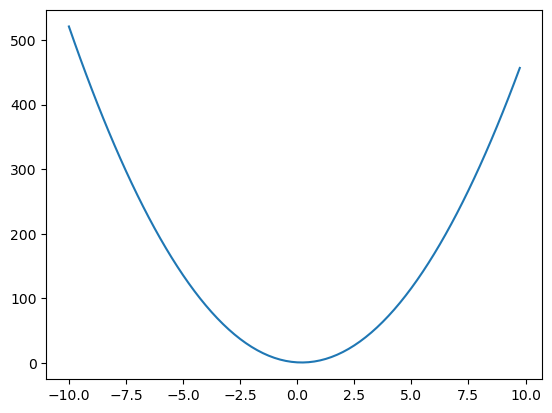

In [7]:
plt.plot(xs, ys)

In [8]:
h = 0.0000001
x = 1/5.009
(f(x+h) - f(x)) / h

-0.0035930314279397635

In [9]:
a = 2
b = -3
c = 10
h = 0.0001
d1 = a*b + c
a += h
d2 = a*b + c
(d2 - d1) / h

-3.000000000010772

In [99]:
class Value:
    def __init__(self,data, _children=(), _op='', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    def __add__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        res = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * res.grad
            other.grad += 1.0 * res.grad
        res._backward = _backward

        return res
    
    def __radd__(self,other):
        return self + other
    
    def __sub__(self,other):
        return self + (-other)
    
    def __neg__(self):
        return self * -1

    def __mul__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        res = Value(self.data * other.data,  (self, other), '*')

        def _backward():
            self.grad += other.data * res.grad
            other.grad += self.data * res.grad
        res._backward = _backward
        return res
    
    def __rmul__(self,other):
        return self * other
    
    def __truediv__(self,other):
        return self * other**-1
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        res = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * res.grad
        res._backward = _backward
        return res
    
    def __pow__(self,other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        res = Value(self.data**other, (self, ), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * res.grad
        res._backward = _backward
        return res
    
    def exp(self):
        x = self.data
        res = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += res.data * res.grad
        res._backward = _backward
        return res
    
    def backward(self):
        self.grad = 1.0
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        for node in reversed(topo):
            node._backward()


    def __repr__(self):
        return f"Value(data={self.data})"

In [100]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
10 + a

Value(data=12.0)

In [68]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right; TB = top to bottom

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad ), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot



In [87]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.88137587, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1
x1w1.label = 'x1*w1'

x2w2 = x2*w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
o.label = 'o'

o.backward()


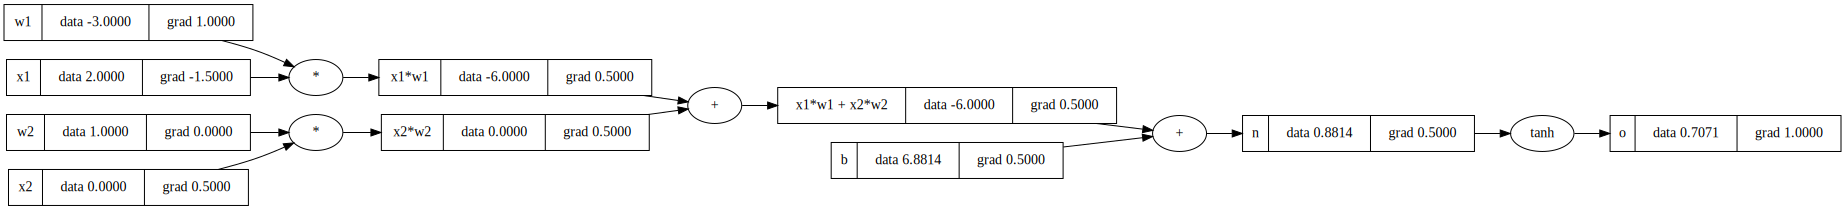

In [88]:
draw_dot(o) # type: ignore

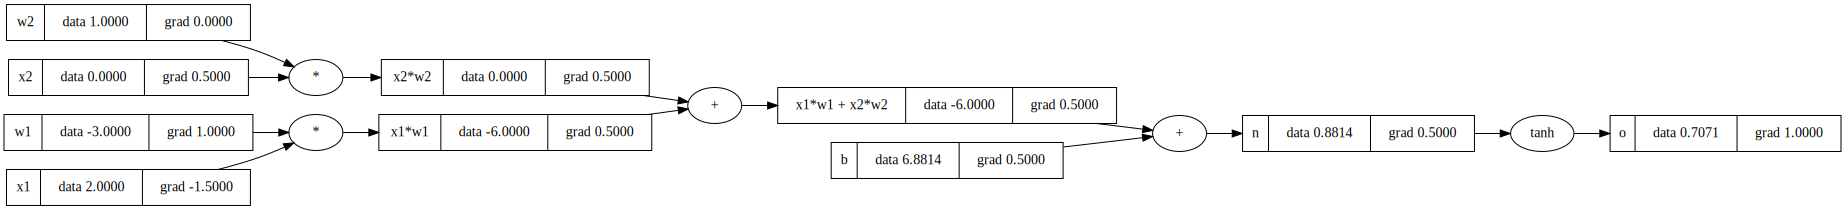

In [72]:
o.backward()
draw_dot(o) 

In [58]:
o.grad = 1.0
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)

for node in reversed(topo):
    node._backward()


In [57]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)

topo

[Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.88137587),
 Value(data=0.8813758700000003),
 Value(data=0.7071079226749335)]

In [46]:
o.grad = 1.0

In [47]:

o._backward()

In [49]:
n._backward()

In [51]:
b._backward()

In [53]:
x1w1x2w2._backward()

In [55]:
x1w1._backward()

x2w2._backward()

In [33]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [31]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [30]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [29]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [28]:
n.grad = 0.5

In [26]:
o.grad = 1.0

In [27]:
1 - (o.data)**2

0.4999983856903403

In [89]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.88137587, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1
x1w1.label = 'x1*w1'

x2w2 = x2*w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'

e = (2*n).exp()
o = (e - 1) / (e + 1)
o.label = 'o'

o.backward()


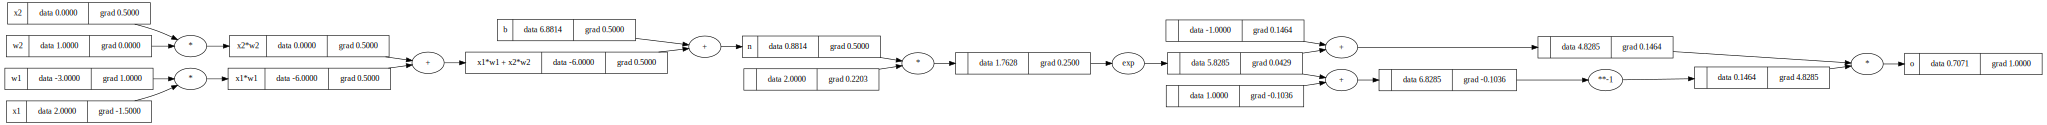

In [90]:
draw_dot(o)

In [124]:
import torch

In [125]:
x1 = torch.Tensor([2.0]).double()  
x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()
x2.requires_grad = True


w1 = torch.Tensor([-3.0]).double()
w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()
w2.requires_grad = True

b = torch.Tensor([6.881375870195432]).double()
b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071078824962277
x2 0.49999844251170106
w2 0.0
x1 -1.4999953275351032
w1 0.9999968850234021


In [153]:
import random


class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        # w * x + b
        act = sum((wi*xi for wi,xi in zip(self.w,x)), self.b) # act = w1*x1 + w2*x2 + b
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]
    
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]
    
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for l in self.layers for p in l.parameters()]



In [188]:
x = [2.0,3.0, -1.0]
n = MLP(3,[4,4,1])
n(x)

Value(data=0.6261386509863723)

In [189]:
n.parameters()

[Value(data=0.09280278762935645),
 Value(data=0.48729359606303224),
 Value(data=0.39763927385727027),
 Value(data=0.28646042867583654),
 Value(data=0.34054338451105237),
 Value(data=-0.45385335479890854),
 Value(data=-0.10919242349994529),
 Value(data=0.9997989399043028),
 Value(data=-0.08668486322104951),
 Value(data=-0.7726016743336686),
 Value(data=0.15013804497755334),
 Value(data=0.2284160683381533),
 Value(data=0.7878363808763356),
 Value(data=-0.6950969499298019),
 Value(data=0.5845961061104386),
 Value(data=0.7788130667171942),
 Value(data=-0.7037744619601793),
 Value(data=0.7240957376644976),
 Value(data=-0.35612184872738895),
 Value(data=0.633111618090459),
 Value(data=0.3781852163245836),
 Value(data=-0.14923298877445346),
 Value(data=-0.5827997449559825),
 Value(data=-0.1496289847919421),
 Value(data=-0.9938563208115996),
 Value(data=0.7400407144105063),
 Value(data=-0.5342435543323281),
 Value(data=-0.2138832172093934),
 Value(data=0.21659323802888664),
 Value(data=-0.7977

In [190]:
len(n.parameters())

41

In [191]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]
ypred

[Value(data=0.6261386509863723),
 Value(data=0.3404258221882077),
 Value(data=0.36957241829452936),
 Value(data=0.6014081149815891)]

In [131]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=5.284198563689719)

In [132]:
loss.backward()

In [133]:
n.layers[0].neurons[0].w[0].grad

0.4287194643454208

In [134]:
n.layers[0].neurons[0].w[0].data

0.23707331528931652

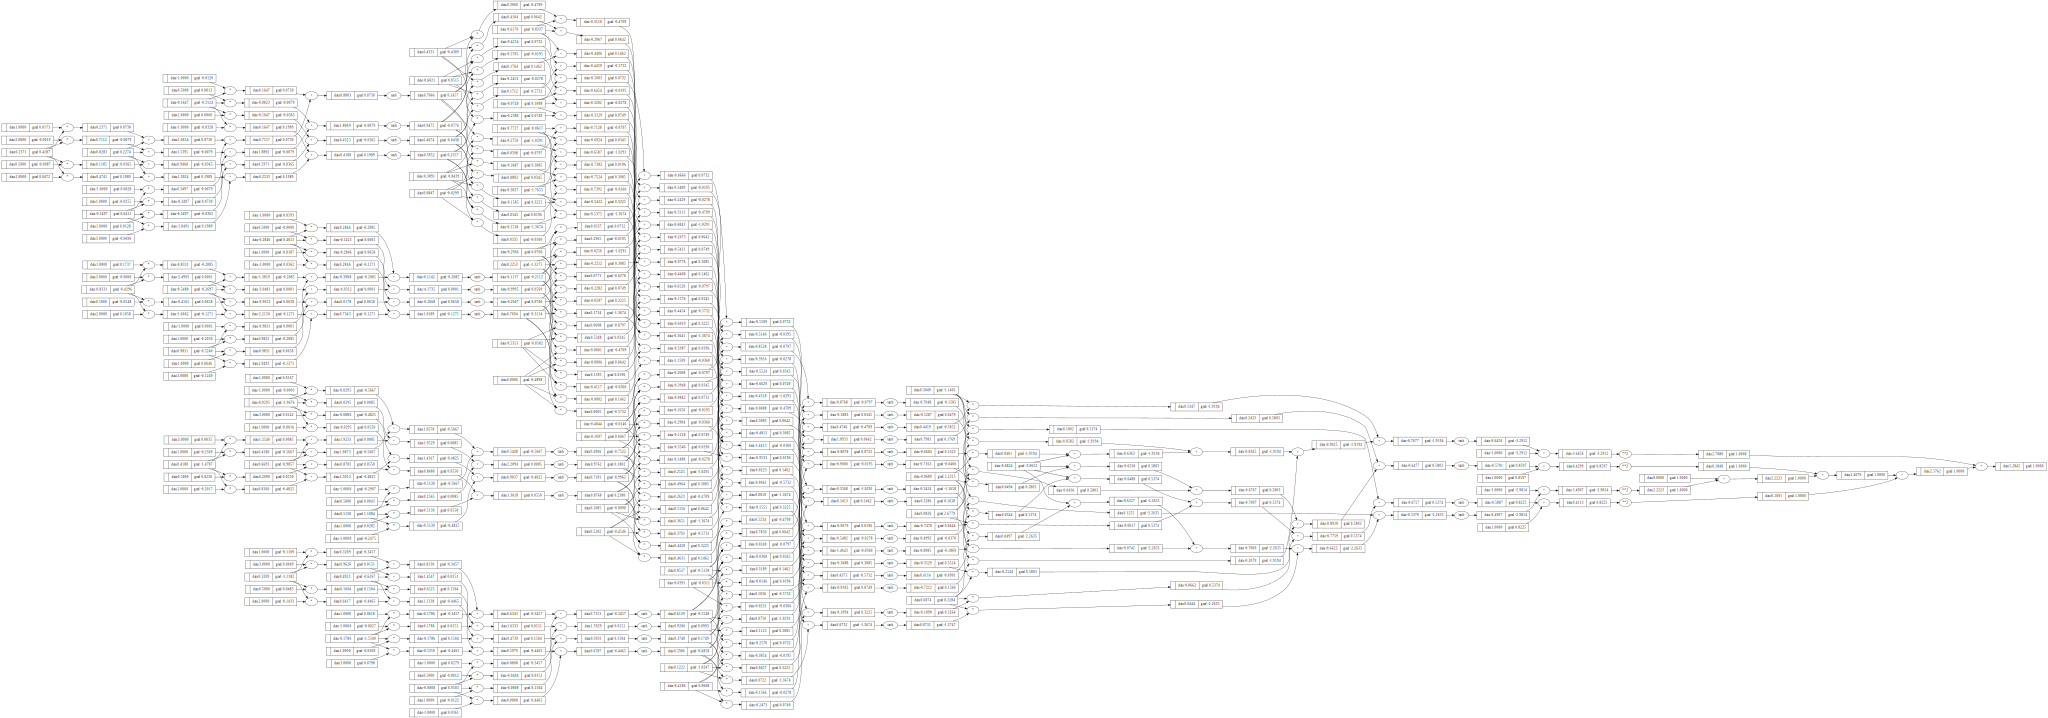

In [135]:
draw_dot(loss)

In [149]:
for p in n.parameters():
    p.data += -0.05 * p.grad
    

In [145]:
n.layers[0].neurons[0].w[0].data

0.22095035866197338

In [150]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=7.153185908957692)

In [151]:
loss.backward()

In [152]:
ypred

[Value(data=0.9613593997221525),
 Value(data=0.8697628028305605),
 Value(data=0.9115042671308757),
 Value(data=0.9572061819941305)]

In [202]:
for k in range(20):
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    for p in n.parameters():
        p.grad = 0.0
    loss.backward()



    for p in n.parameters():
        p.data += -0.1 * p.grad
    
    print(k, loss.data)

0 0.003119885277818249
1 0.0030872395278489263
2 0.0030552515981986344
3 0.00302390200399337
4 0.0029931720183585205
5 0.002963043636030333
6 0.0029334995390395127
7 0.002904523064330516
8 0.0028760981731905735
9 0.0028482094223719104
10 0.002820841936798422
11 0.002793981383757089
12 0.0027676139484804105
13 0.002741726311033401
14 0.002716305624424853
15 0.002691339493867778
16 0.002666815957119425
17 0.0026427234658360117
18 0.002619050867881637
19 0.002595787390534944


In [203]:
ypred

[Value(data=0.9747138332298729),
 Value(data=-0.9790448272153687),
 Value(data=-0.9712564879354396),
 Value(data=0.9737114395911647)]